In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
df = pd.read_csv('main.csv')

In [4]:
df

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy,"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Timestamp
0,https://www.google.com/,True,170821,96.0,1.289699e+05,0.000097,0.043003,0.023918,0.037282,0.020736,2022-05-04 15:22:06
1,https://www.youtube.com/,True,3543405,32.0,2.675271e+06,0.002018,0.892021,0.496142,0.773354,0.430140,2022-05-04 12:43:07
2,https://www.facebook.com/,True,435816,91.0,3.290411e+05,0.000248,0.109713,0.061022,0.095118,0.052904,2022-05-04 15:22:15
3,https://www.netflix.com/fr-en/,True,2004776,54.0,1.513606e+06,0.001142,0.504685,0.280706,0.437546,0.243363,2022-05-04 15:22:28
4,https://www.microsoft.com/fr-fr/,False,768548,80.0,5.802537e+05,0.000438,0.193475,0.107611,0.167737,0.093295,2022-05-04 15:22:44
...,...,...,...,...,...,...,...,...,...,...,...
50029,https://genericsildenafil.online/,True,35581,99.0,2.686365e+04,0.000020,0.008957,0.004982,0.007766,0.004319,2022-05-21 14:59:31
50030,https://www.myamcat.com/,False,37919212,1.0,2.862901e+07,0.021597,9.545830,5.309390,8.275932,4.603073,2022-05-21 14:59:40
50031,https://nobaproject.com/,True,1859882,57.0,1.404211e+06,0.001059,0.468209,0.260418,0.405922,0.225774,2022-05-21 14:59:21
50032,https://govst.edu/,False,19112240,3.0,1.442974e+07,0.010885,4.811339,2.676067,4.171279,2.320065,2022-05-21 15:00:13


In [5]:
df.columns = ['URL', 'Green Hosting', 'Bytes', 'Cleaner Than %', "Statistics: Adjusted Bytes", "Statistics: Energy", "Statistics: CO2 Grams, Grid", "Statistics: CO2 Litres, Grid", "Statistics: CO2 Grams, Renewable", "Statistics: CO2 Litres, Renewable", "Timestamp"]

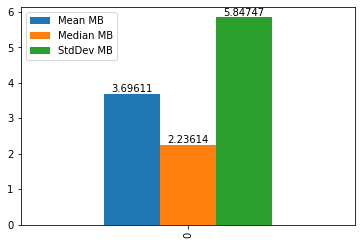

In [6]:
mean = (df['Bytes'].mean() / 1e+6)
median = (df['Bytes'].median() / 1e+6)
std = (df['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'])
plt.show()

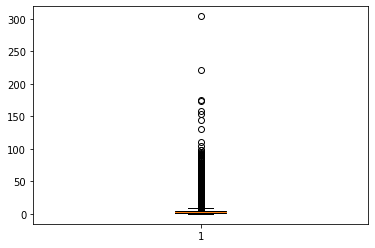

<Figure size 1440x1008 with 0 Axes>

In [7]:
plt.boxplot(df['Bytes'] / 1e+6)
fig = plt.figure(figsize =(20, 14))
plt.show()

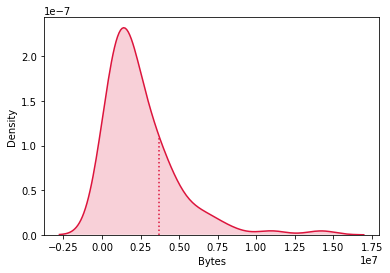

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.random.normal(np.tile(np.random.uniform(10, 30, 5), 50), 3)
ax = sns.kdeplot(df['Bytes'][0:100], shade=False, color='crimson')
kdeline = ax.lines[0]
mean = df['Bytes'].mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='crimson', ls=':')
ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
plt.show()

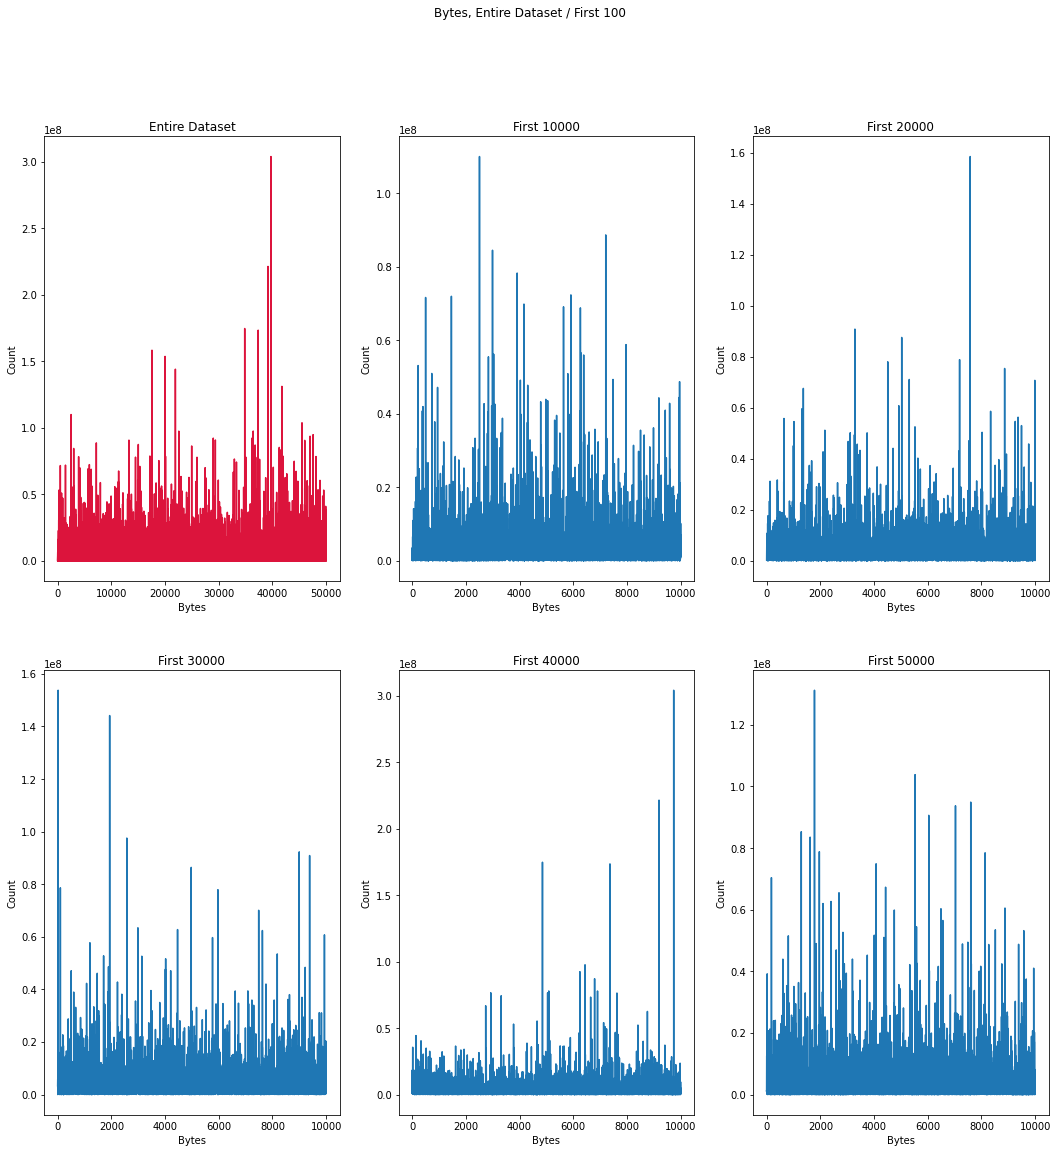

In [28]:
def byte_to_mb(x):
    return x / 1e+6

bytes = df['Bytes']
bytes10k = df['Bytes'][0:10000]
bytes20k = df['Bytes'][10000:20000]
bytes30k = df['Bytes'][20000:30000]
bytes40k = df['Bytes'][30000:40000]
bytes50k = df['Bytes'][40000:50000]

byte_to_mb(bytes)
byte_to_mb(bytes10k)
byte_to_mb(bytes20k)
byte_to_mb(bytes30k)
byte_to_mb(bytes40k)
byte_to_mb(bytes50k)

bytes = bytes.to_list()
bytes10k = bytes10k.to_list()
bytes20k = bytes20k.to_list()
bytes30k = bytes30k.to_list()
bytes40k = bytes40k.to_list()
bytes50k = bytes50k.to_list()

fig, axs = plt.subplots(2, 3, figsize=(18, 18))
fig.suptitle('Bytes, Entire Dataset / First 100')
axs[0][0].plot(bytes, color='crimson')
axs[0][0].set_title('Entire Dataset')

axs[0][1].plot(bytes10k)
axs[0][1].set_title('First 10000')

axs[0][2].plot(bytes20k)
axs[0][2].set_title('First 20000')

axs[1][0].plot(bytes30k)
axs[1][0].set_title('First 30000')

axs[1][1].plot(bytes40k)
axs[1][1].set_title('First 40000')

axs[1][2].plot(bytes50k)
axs[1][2].set_title('First 50000')

for ax in axs.flat:
    ax.set(xlabel='Bytes', ylabel='Count')

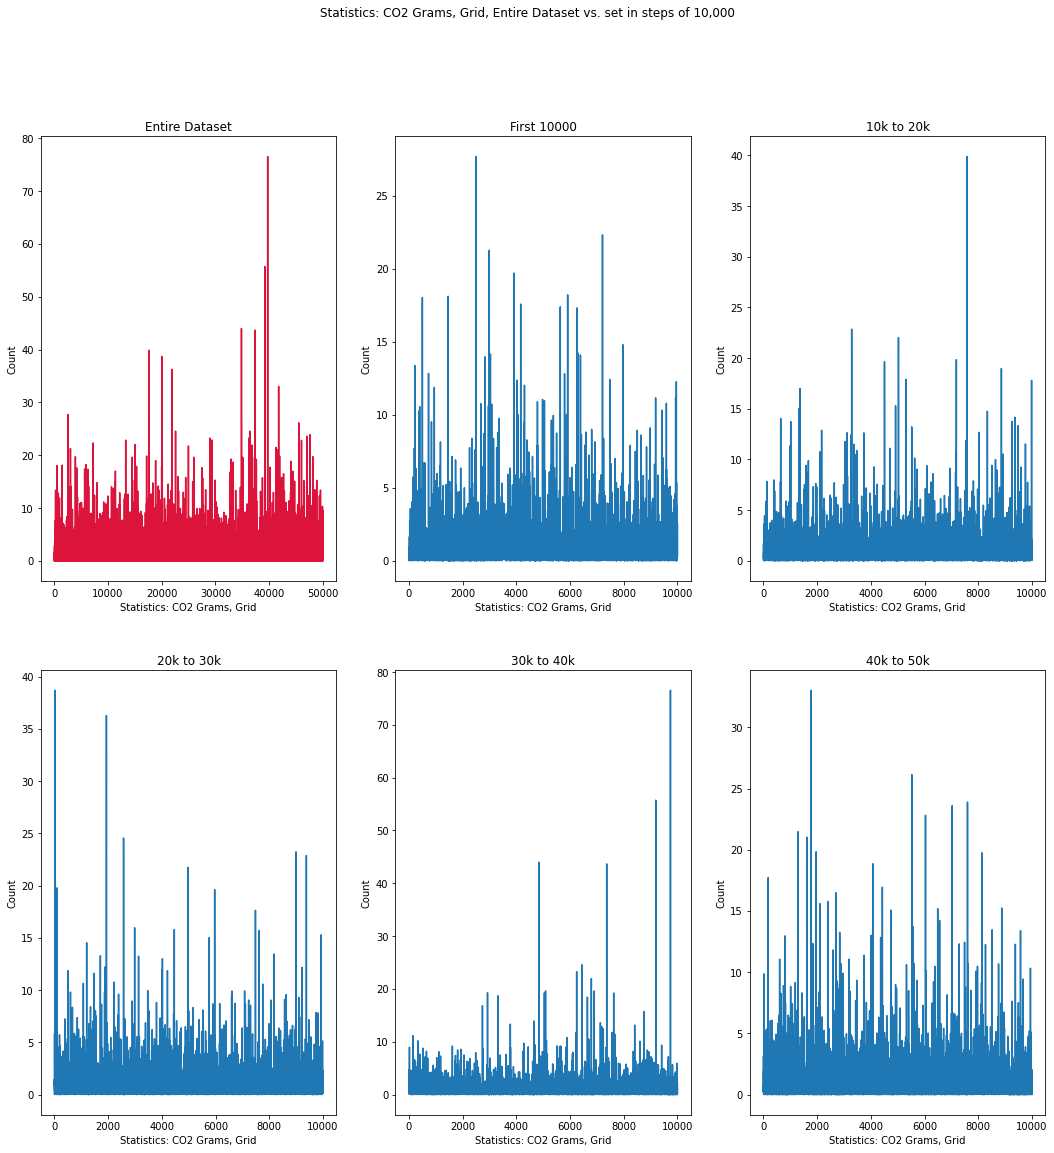

In [35]:
def byte_to_mb(x):
    return x / 1e+6

bytes = df['Statistics: CO2 Grams, Grid']
bytes10k = df['Statistics: CO2 Grams, Grid'][0:10000]
bytes20k = df['Statistics: CO2 Grams, Grid'][10000:20000]
bytes30k = df['Statistics: CO2 Grams, Grid'][20000:30000]
bytes40k = df['Statistics: CO2 Grams, Grid'][30000:40000]
bytes50k = df['Statistics: CO2 Grams, Grid'][40000:50000]

byte_to_mb(bytes)
byte_to_mb(bytes10k)
byte_to_mb(bytes20k)
byte_to_mb(bytes30k)
byte_to_mb(bytes40k)
byte_to_mb(bytes50k)

bytes = bytes.to_list()
bytes10k = bytes10k.to_list()
bytes20k = bytes20k.to_list()
bytes30k = bytes30k.to_list()
bytes40k = bytes40k.to_list()
bytes50k = bytes50k.to_list()

fig, axs = plt.subplots(2, 3, figsize=(18, 18))
fig.suptitle('Statistics: CO2 Grams, Grid, Entire Dataset vs. set in steps of 10,000')
axs[0][0].plot(bytes, color='crimson')
axs[0][0].set_title('Entire Dataset')

axs[0][1].plot(bytes10k)
axs[0][1].set_title('First 10000')

axs[0][2].plot(bytes20k)
axs[0][2].set_title('10k to 20k')

axs[1][0].plot(bytes30k)
axs[1][0].set_title('20k to 30k')

axs[1][1].plot(bytes40k)
axs[1][1].set_title('30k to 40k')

axs[1][2].plot(bytes50k)
axs[1][2].set_title('40k to 50k')

for ax in axs.flat:
    ax.set(xlabel='Statistics: CO2 Grams, Grid', ylabel='Count')

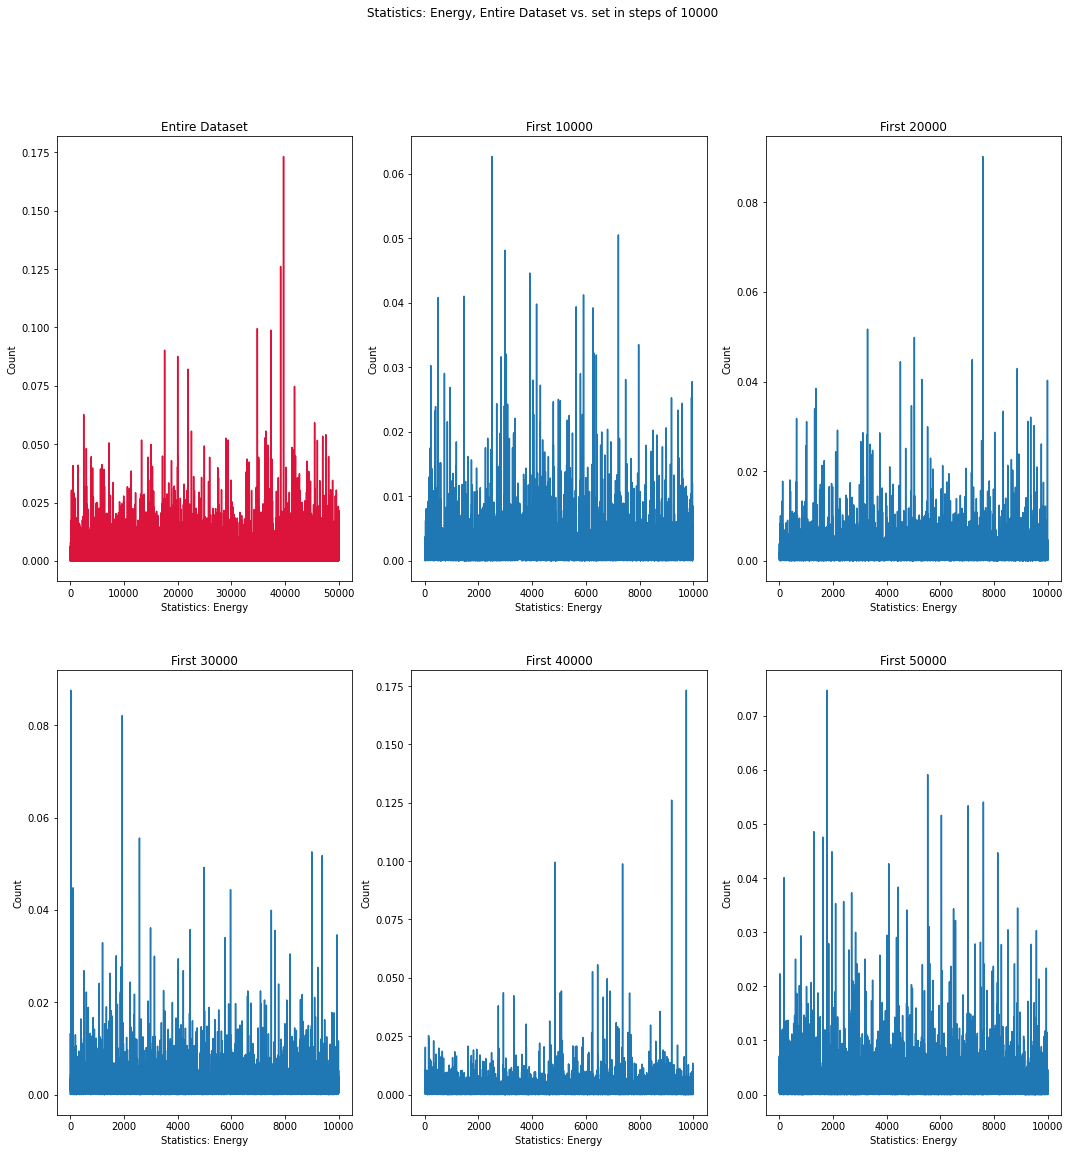

In [33]:
def byte_to_mb(x):
    return x / 1e+6

bytes = df['Statistics: Energy']
bytes10k = df['Statistics: Energy'][0:10000]
bytes20k = df['Statistics: Energy'][10000:20000]
bytes30k = df['Statistics: Energy'][20000:30000]
bytes40k = df['Statistics: Energy'][30000:40000]
bytes50k = df['Statistics: Energy'][40000:50000]

byte_to_mb(bytes)
byte_to_mb(bytes10k)
byte_to_mb(bytes20k)
byte_to_mb(bytes30k)
byte_to_mb(bytes40k)
byte_to_mb(bytes50k)

bytes = bytes.to_list()
bytes10k = bytes10k.to_list()
bytes20k = bytes20k.to_list()
bytes30k = bytes30k.to_list()
bytes40k = bytes40k.to_list()
bytes50k = bytes50k.to_list()

fig, axs = plt.subplots(2, 3, figsize=(18, 18))
fig.suptitle('Statistics: Energy, Entire Dataset vs. set in steps of 10000')
axs[0][0].plot(bytes, color='crimson')
axs[0][0].set_title('Entire Dataset')

axs[0][1].plot(bytes10k)
axs[0][1].set_title('First 10000')

axs[0][2].plot(bytes20k)
axs[0][2].set_title('First 20000')

axs[1][0].plot(bytes30k)
axs[1][0].set_title('First 30000')

axs[1][1].plot(bytes40k)
axs[1][1].set_title('First 40000')

axs[1][2].plot(bytes50k)
axs[1][2].set_title('First 50000')

for ax in axs.flat:
    ax.set(xlabel='Statistics: Energy', ylabel='Count')

<AxesSubplot:xlabel='Bytes', ylabel='Cleaner Than %'>

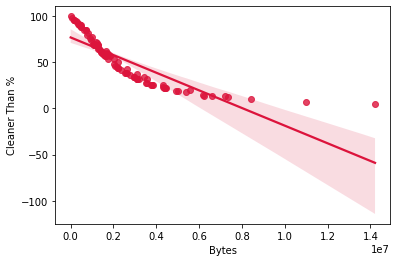

In [10]:
sns.regplot(x=df["Bytes"][0:100], y=df["Cleaner Than %"][0:100], color='crimson')

In [11]:
df = df.drop_duplicates(subset=['URL'], keep='first')

# Ranges

In [12]:
first100 = df.head(100)
last100 = df.tail(100)

In [13]:
first100['Bytes'].mean()
last100['Bytes'].mean()

4373832.11

In [14]:
first100['Bytes'].median()
last100['Bytes'].median()

2294098.0

In [15]:
first100['Statistics: Energy'].mean()
last100['Statistics: Energy'].mean()

0.0024911174800903075

In [16]:
first100['Statistics: Energy'].median()
last100['Statistics: Energy'].median()

0.0013066042511723501

In [17]:
first100['Statistics: CO2 Grams, Grid'].mean()
last100['Statistics: CO2 Grams, Grid'].mean()

1.1010739261999363

In [18]:
first100['Statistics: CO2 Grams, Grid'].median()
last100['Statistics: CO2 Grams, Grid'].median()

0.5775190790181979

In [19]:
true = df[df['Green Hosting'].str.contains('True')]
unknown = df[df['Green Hosting'].str.contains('unknown')]

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Stats for True and Unknown per quartiles maybe, or for how Cleaner Than % is distributed along with the other stats.
# Splitting the dataframe into subgroups and then generating stats for each subgroup should be the best way to do this.

# Per Top-level Domain / Site
## Companies

In [ ]:
google = df[df['URL'].str.contains('google')]
microsoft = df[df['URL'].str.contains('microsoft')]
apple = df[df['URL'].str.contains('.apple.com')]
airbnb = df[df['URL'].str.contains('airbnb')]
netflix = df[df['URL'].str.contains('netflix')]
marvel = df[df['URL'].str.contains('marvel')]
nike = df[df['URL'].str.contains('nike')]
adiddas = df[df['URL'].str.contains('adiddas')]
gucci = df[df['URL'].str.contains('gucci')]
ikea = df[df['URL'].str.contains('ikea')]
lenovo = df[df['URL'].str.contains('lenovo')]
asus = df[df['URL'].str.contains('asus')]
huawei = df[df['URL'].str.contains('huawei')]
disney = df[df['URL'].str.contains('disney')]
warner = df[df['URL'].str.contains('warner')]
canon = df[df['URL'].str.contains('canon')]
xiaomi = df[df['URL'].str.contains('xiaomi')]
nintendo = df[df['URL'].str.contains('nintendo')]
playstation = df[df['URL'].str.contains('playstation')]
xbox = df[df['URL'].str.contains('xbox')]
sony = df[df['URL'].str.contains('sony')]
logitech = df[df['URL'].str.contains('logitech')]
toshiba = df[df['URL'].str.contains('toshiba')]
bosch = df[df['URL'].str.contains('bosch')]
philips = df[df['URL'].str.contains('philips')]
linkedin = df[df['URL'].str.contains('linkedin')]
uber = df[df['URL'].str.contains('uber')]

In [ ]:
google
microsoft
apple
airbnb
linkedin

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy,"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Timestamp
8,https://www.linkedin.com/,unknown,413977,0.90,312552.635,0.000236,0.104215,0.057964,0.090351,0.050253,1651677871
1407,https://www.linkedin.com/hp,unknown,416020,0.90,314095.100,0.000237,0.104729,0.058250,0.090797,0.050501,1651679517
1889,https://www.linkedin.cn/injobs/hp/,unknown,130028,0.97,98171.140,0.000074,0.032733,0.018206,0.028379,0.015784,1651685519
4934,https://www.linkedin.com/learning/?trk=lynda_r...,unknown,2485676,0.40,1876685.380,0.001416,0.625747,0.348041,0.542503,0.301740,1651691409


# Regional
## Original

In [ ]:
com = df[df['URL'].str.contains('.com/', regex = False)]
gov = df[df['URL'].str.contains('.gov/', regex = False)]
org = df[df['URL'].str.contains('.org/', regex = False)]
net = df[df['URL'].str.contains('.net/', regex = False)]
edu = df[df['URL'].str.contains('.edu/', regex = False)]
int = df[df['URL'].str.contains('.int/', regex = False)]
mil = df[df['URL'].str.contains('.mil/', regex = False)]
app = df[df['URL'].str.contains('.app/', regex = False)]

In [ ]:
# com
# couk
# gov
# bg
# app

## Most Popular

In [ ]:
com = df[df['URL'].str.contains('.com/', regex = False)]
# Finish per link https://www.statista.com/statistics/265677/number-of-internet-top-level-domains-worldwide/

## Per Continent / Country
### EU + UK

In [ ]:
eu = df[df['URL'].str.contains('.eu/', regex = False)] # EU
at = df[df['URL'].str.contains('.at/', regex = False)] # Austria
be = df[df['URL'].str.contains('.be/', regex = False)] # Belgium
bg = df[df['URL'].str.contains('.bg/', regex = False)] # Bulgaria
by = df[df['URL'].str.contains('.by/', regex = False)] # Belarus
hr = df[df['URL'].str.contains('.hr/', regex = False)] # Croatia
cz = df[df['URL'].str.contains('.cz/', regex = False)] # Czech Republic
de = df[df['URL'].str.contains('.de/', regex = False)] # Germany
dk = df[df['URL'].str.contains('.dk/', regex = False)] # Denmark
ee = df[df['URL'].str.contains('.ee/', regex = False)] # Estonia
es = df[df['URL'].str.contains('.es/', regex = False)] # Spain
fi = df[df['URL'].str.contains('.fi/', regex = False)] # Finland
fr = df[df['URL'].str.contains('.fr/', regex = False)] # France
gr = df[df['URL'].str.contains('.gr/', regex = False)] # Greece
hu = df[df['URL'].str.contains('.hu/', regex = False)] # Hungary
ie = df[df['URL'].str.contains('.ie/', regex = False)] # Ireland
it = df[df['URL'].str.contains('.it/', regex = False)] # Italy
lv = df[df['URL'].str.contains('.lv/', regex = False)] # Latvia
lt = df[df['URL'].str.contains('.lt/', regex = False)] # Lithuania
lu = df[df['URL'].str.contains('.lu/', regex = False)] # Luxembourg
mt = df[df['URL'].str.contains('.mt/', regex = False)] # Malta
uk = df[df['URL'].str.contains('.uk/', regex = False)] # United Kingdom
gb = df[df['URL'].str.contains('.gb/', regex = False)] # Great Britain
nl = df[df['URL'].str.contains('.nl/', regex = False)] # Netherlands
pl = df[df['URL'].str.contains('.pl/', regex = False)] # Poland
pt = df[df['URL'].str.contains('.pt/', regex = False)] # Portugal
ro = df[df['URL'].str.contains('.ro/', regex = False)] # Romania
sk = df[df['URL'].str.contains('.sk/', regex = False)] # Slovakia
si = df[df['URL'].str.contains('.si/', regex = False)] # Slovenia
se = df[df['URL'].str.contains('.se/', regex = False)] # Sweden

In [ ]:
lu

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy,"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Timestamp
4302,https://tool.lu/,unknown,32122,0.99,24252.110,0.000018,0.008086,0.004498,0.007011,0.003899,1651690388
6221,https://www.google.lu/,True,170943,0.96,129061.965,0.000097,0.043033,0.023935,0.037309,0.020751,1651692913
9263,https://mjt.lu/,True,4517,1.00,3410.335,0.000003,0.001137,0.000632,0.000986,0.000548,1651752265
18259,https://wwwen.uni.lu/,unknown,1700191,0.55,1283644.205,0.000968,0.428008,0.238058,0.371070,0.206389,1651845822
18423,https://www.rtl.lu/,unknown,8703834,0.10,6571394.670,0.004957,2.191114,1.218698,1.899626,1.056572,1651846333
23043,https://kuku.lu/,True,34618,0.99,26136.590,0.000020,0.008715,0.004847,0.007555,0.004202,1651915962
29544,https://www.wort.lu/de,True,2320842,0.48,1752235.710,0.001322,0.584252,0.324961,0.506528,0.281731,1652363697
36109,https://gouvernement.lu/fr.html,unknown,4162878,0.24,3142972.890,0.002371,1.047968,0.582880,0.908555,0.505338,1652454576
38923,https://www.lessentiel.lu/fr,unknown,2148468,0.45,1622093.340,0.001224,0.540858,0.300825,0.468907,0.260806,1652533365


### North America

In [ ]:
us = df[df['URL'].str.contains('.us/', regex = False)] # United States
ca = df[df['URL'].str.contains('.ca/', regex = False)] # Canada
mx = df[df['URL'].str.contains('.mx/', regex = False)] # Mexico
bz = df[df['URL'].str.contains('.bz/', regex = False)] # Belize
cr = df[df['URL'].str.contains('.cr/', regex = False)] # Costa Rica
sv = df[df['URL'].str.contains('.sv/', regex = False)] # El Salvador
gt = df[df['URL'].str.contains('.gt/', regex = False)] # Guatemala
hn = df[df['URL'].str.contains('.hn/', regex = False)] # Honduras
ni = df[df['URL'].str.contains('.ni/', regex = False)] # Nicaragua
pa = df[df['URL'].str.contains('.pa/', regex = False)] # Panama

### South America

In [ ]:
ar = df[df['URL'].str.contains('.ar/', regex = False)] # Argentina
bo = df[df['URL'].str.contains('.bo/', regex = False)] # Bolivia
br = df[df['URL'].str.contains('.br/', regex = False)] # Brazil
cl = df[df['URL'].str.contains('.cl/', regex = False)] # Chile
co = df[df['URL'].str.contains('.co/', regex = False)] # Colombia
ec = df[df['URL'].str.contains('.ec/', regex = False)] # Ecuador
gy = df[df['URL'].str.contains('.gy/', regex = False)] # Guyana
pa = df[df['URL'].str.contains('.pa/', regex = False)] # Panama
pe = df[df['URL'].str.contains('.pe/', regex = False)] # Peru
py = df[df['URL'].str.contains('.py/', regex = False)] # Paraguay
sr = df[df['URL'].str.contains('.sr/', regex = False)] # Suriname
tt = df[df['URL'].str.contains('.tt/', regex = False)] # Trinidad and Tobago
uy = df[df['URL'].str.contains('.uy/', regex = False)] # Uruguay
ve = df[df['URL'].str.contains('.ve/', regex = False)] # Venezuela

### Asia

In [ ]:
asia = df[df['URL'].str.contains('.asia/', regex = False)] # Asia
ru = df[df['URL'].str.contains('.ru/', regex = False)] # Russia
cn = df[df['URL'].str.contains('.cn/', regex = False)] # China
jp = df[df['URL'].str.contains('.jp/', regex = False)] # Japan
kr = df[df['URL'].str.contains('.kr/', regex = False)] # Korea
tw = df[df['URL'].str.contains('.tw/', regex = False)] # Taiwan
hk = df[df['URL'].str.contains('.hk/', regex = False)] # Hong Kong
id = df[df['URL'].str.contains('.id/', regex = False)] # Indonesia
my = df[df['URL'].str.contains('.my/', regex = False)] # Malaysia
ph = df[df['URL'].str.contains('.ph/', regex = False)] # Philippines
sg = df[df['URL'].str.contains('.sg/', regex = False)] # Singapore
th = df[df['URL'].str.contains('.th/', regex = False)] # Thailand
vn = df[df['URL'].str.contains('.vn/', regex = False)] # Vietnam
id = df[df['URL'].str.contains('.in/', regex = False)] # India
kp = df[df['URL'].str.contains('.kp/', regex = False)] # North Korea
vn = df[df['URL'].str.contains('.vn/', regex = False)] # Vietnam
af = df[df['URL'].str.contains('.af/', regex = False)] # Afghanistan
am = df[df['URL'].str.contains('.am/', regex = False)] # Armenia
az = df[df['URL'].str.contains('.az/', regex = False)] # Azerbaijan
bd = df[df['URL'].str.contains('.bd/', regex = False)] # Bangladesh
bt = df[df['URL'].str.contains('.bt/', regex = False)] # Bhutan
bn = df[df['URL'].str.contains('.bn/', regex = False)] # Brunei
kh = df[df['URL'].str.contains('.kh/', regex = False)] # Cambodia



### Middle East

In [ ]:

ae = df[df['URL'].str.contains('.ae/', regex = False)] # United Arab Emirates
sa = df[df['URL'].str.contains('.sa/', regex = False)] # Saudi Arabia
bh = df[df['URL'].str.contains('.bh/', regex = False)] # Bahrain
iq = df[df['URL'].str.contains('.iq/', regex = False)] # Iraq
jo = df[df['URL'].str.contains('.jo/', regex = False)] # Jordan
kw = df[df['URL'].str.contains('.kw/', regex = False)] # Kuwait
lb = df[df['URL'].str.contains('.lb/', regex = False)] # Lebanon
om = df[df['URL'].str.contains('.om/', regex = False)] # Oman
qa = df[df['URL'].str.contains('.qa/', regex = False)] # Qatar
sy = df[df['URL'].str.contains('.sy/', regex = False)] # Syria
tr = df[df['URL'].str.contains('.tr/', regex = False)] # Turkey
ir = df[df['URL'].str.contains('.ir/', regex = False)] # Iran
il = df[df['URL'].str.contains('.il/', regex = False)] # Israel


### Oceania

In [ ]:
au = df[df['URL'].str.contains('.au/', regex = False)]

## Other

In [ ]:
dev = df[df['URL'].str.contains('.dev/', regex = False)]
inc = df[df['URL'].str.contains('.inc/', regex = False)]
biz = df[df['URL'].str.contains('.biz/', regex = False)]
info = df[df['URL'].str.contains('.info/', regex = False)]
live = df[df['URL'].str.contains('.live/', regex = False)]
news = df[df['URL'].str.contains('.news/', regex = False)]

In [ ]:
# dev
# info
# live
# news